# A satellite view of the December 2015 Momotombo eruption

Author: [Leonardo Uieda](https://www.leouieda.com/)

We'll use a Landsat 8 scene taken during the Decmber 2015 eruption of [Momotombo](https://en.wikipedia.org/wiki/Momotombo), Nicaragua. The scene was downloaded from [USGS EarthExplorer](https://earthexplorer.usgs.gov/) (WRS row/path = `017/051`) and selected bands were uploaded as compressed archives to [figshare (doi:10.6084/m9.figshare.21931089)](https://doi.org/10.6084/m9.figshare.21931089) for archival and easier retrieval using [Pooch](https://www.fatiando.org/pooch). 

Let's get started!

## Import libraries

We'll use the following libraries to manipulate the data and make some nice figures:

* [matplotlib](https://matplotlib.org/): the most popular Python plotting library (for a good reason, it's awesome).
* [matplotlib-scalebar](https://pypi.org/project/matplotlib-scalebar/): to add a scale bar to matplotlib figures (a good map always has a scale).
* [xlandsat](https://www.compgeolab.org/xlandsat/): a library developed by us at the [CompGeoLab](https://www.compgeolab.org/) for loading the Landsat scenes into [xarray](https://xarray.dev/) and making composites.
* [pooch](https://www.fatiando.org/pooch): for downloading data from a variety of sources, including figshare DOIs.

In [1]:
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import xarray as xr
import numpy as np
import xlandsat as xls
import pooch

## Download the archived data

First, we'll use [Pooch](https://www.fatiando.org/pooch) to download the archives with the scenes. The MD5 checksum was copied from the [figshare archive](https://doi.org/10.6084/m9.figshare.21931089) and is used by Pooch to verify if the download was successful. The archive is around 600 Mb in size so this can take a little while depending on your internet connection.

In [2]:
doi = "10.6084/m9.figshare.21931089"
path = pooch.retrieve(
    f"doi:{doi}/LC08_L2SP_017051_20151205_20200908_02_T1.tar.gz",
    known_hash="md5:6ad07cdd3ffc6a3b05b5fe6d776bda43",
    progressbar=True,
)

## Load the scene

Next, we'll use [xlandsat](https://www.compgeolab.org/xlandsat/) to load a section of the scene into an `xarray.Dataset`.

In [3]:
region = [544000, 558000, 1369000, 1379000]  # UTM West, East, South, North
scene = xls.load_scene(path, region=region)
scene

/home/leo/bin/conda/envs/momotombo/lib/python3.10/site-packages/xlandsat/_io.py:145: RuntimeWarning: overflow encountered in cast
  band = reader.read_band(fname).astype(dtype)[::-1, :]


<xarray.Dataset>
Dimensions:   (easting: 467, northing: 333)
Coordinates:
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Data variables:
    blue      (northing, easting) float16 -0.05554 -0.05481 ... 0.07788 0.07727
    green     (northing, easting) float16 0.04834 0.05066 ... 0.1056 0.1027
    red       (northing, easting) float16 0.006226 0.01105 ... 0.1163 0.1045
    nir       (northing, easting) float16 0.01483 0.02124 ... 0.2435 0.2367
    swir1     (northing, easting) float16 0.06189 0.06409 ... 0.2098 0.1976
    swir2     (northing, easting) float16 0.06519 0.06628 ... 0.1571 0.1527
    thermal   (northing, easting) float16 293.5 293.5 293.8 ... 311.0 312.0
Attributes: (12/19)
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2015-12-05 (path/row=17/51)
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_017051_20151205_20200908_02_T1
    processing_level:           L2SP
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2015-12-05
    scene_center_time:          16:06:06.8773380Z
    wrs_path:                   17
    wrs_row:                    51
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

One of the nice things about `xlandsat` is that it will include a lot of the metadata from the scenes in the `xarray.Dataset` and set the proper UTM coordinates for each pixel. This allows `xarray` to automate a lot of the boring parts of creating figures (setting axis labels, etc).

## Make some plots

Let's make an RGB (AKA "true color") composite to get an idea of what's going on. Generating composites with `xlandsat` is easy and by default it will use the red, green, and blue bands of the scene. We can also apply some re-scaling of the reflectance of each band to increase the contrast and avoid having the clouds and human structures saturate the image.

In [4]:
rgb = xls.composite(scene, rescale_to=(0, 0.20))

/home/leo/bin/conda/envs/momotombo/lib/python3.10/site-packages/skimage/exposure/exposure.py:598: RuntimeWarning: invalid value encountered in cast
  return np.asarray(image * (omax - omin) + omin, dtype=out_dtype)


The composite is an `xarray.DataArray` that includes the right coordinates and metadata. Plotting it is as easy as calling `rgb.plot.imshow()`. We'll use a bit more code here tweak some of the plot elements, in particular making the pixels squared by setting `ax.set_aspect("equal")`. 

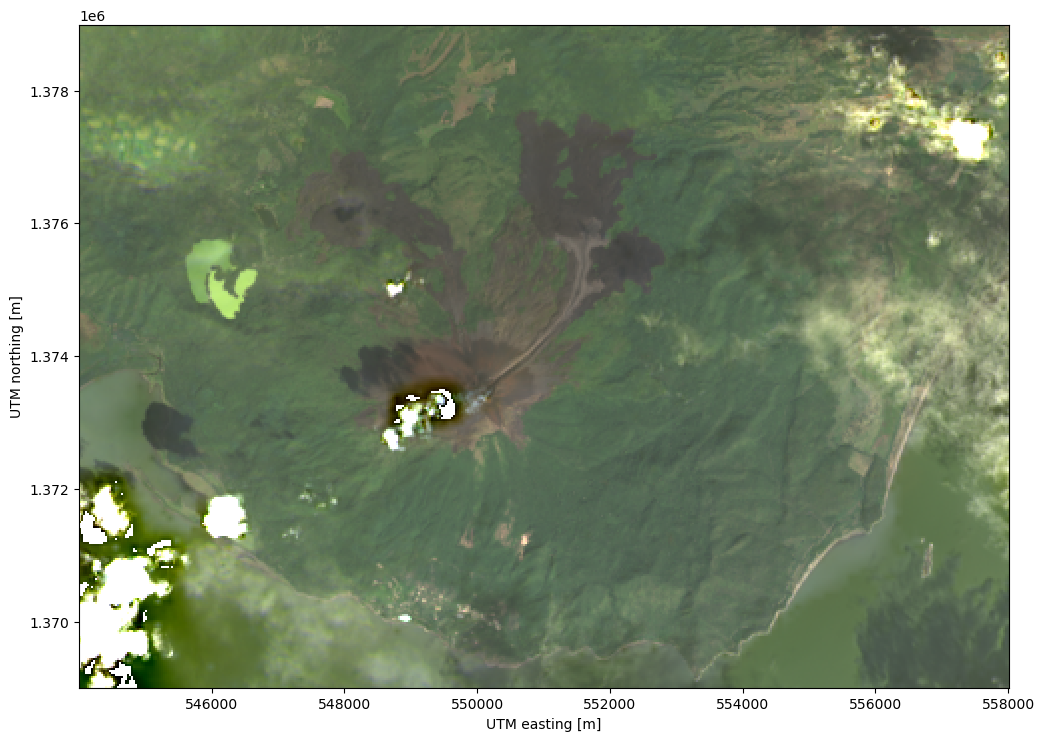

In [5]:
fig = plt.figure(figsize=(12, 15))
ax = plt.subplot(111)
rgb.plot.imshow(ax=ax)
ax.set_aspect("equal")
plt.show()

Can't see the current lava flow properly. Let's have a look at the thermal band to see if it shows anything.

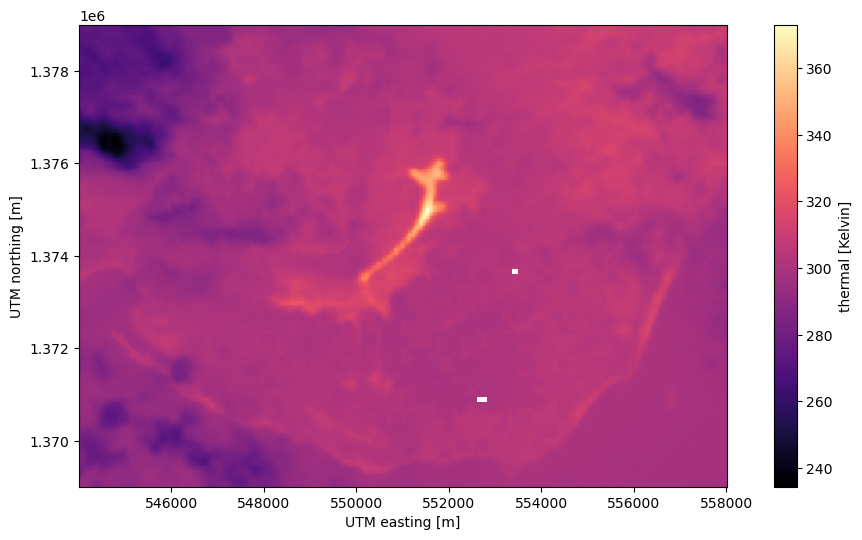

In [6]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
scene.thermal.plot(ax=ax, cmap="magma")
ax.set_aspect("equal")
plt.show()

## Plot everything together

Now we can make a nicer figure combining the different bands, with a scale bar and a caption at the bottom.

/home/leo/bin/conda/envs/momotombo/lib/python3.10/site-packages/skimage/exposure/exposure.py:598: RuntimeWarning: invalid value encountered in cast
  return np.asarray(image * (omax - omin) + omin, dtype=out_dtype)
/tmp/ipykernel_172277/1062396656.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0, w_pad=0, h_pad=0)


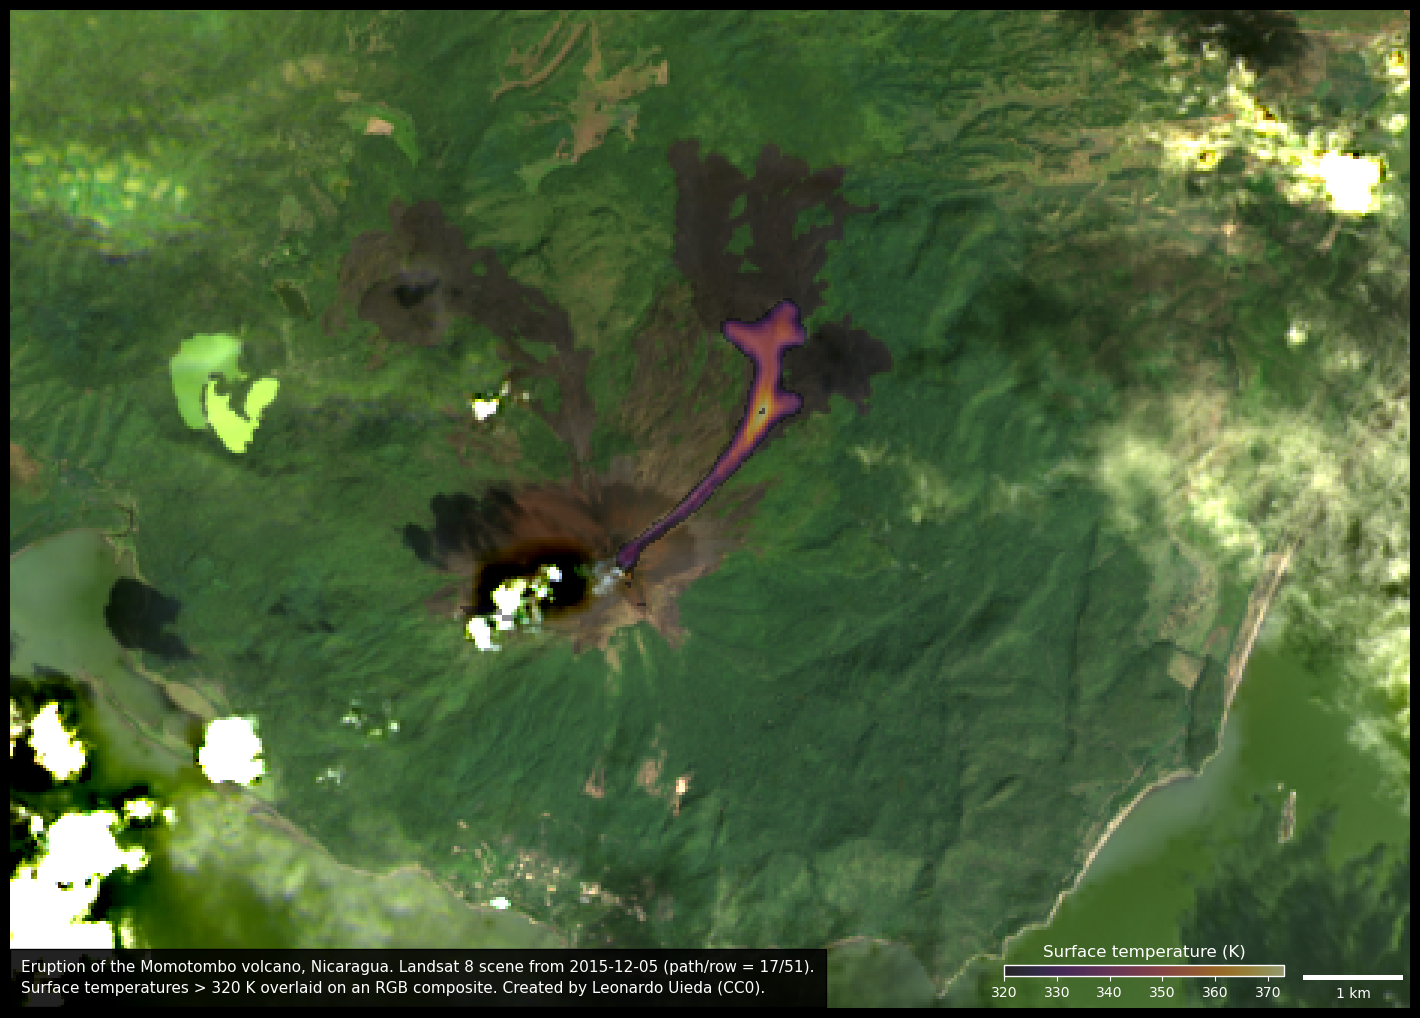

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(14, 11), facecolor="black")
xls.composite(scene, rescale_to=(0.04, 0.17)).plot.imshow(ax=ax)
tmp = xr.where(scene.thermal >= 320, scene.thermal, np.nan).plot(ax=ax, cmap="inferno", alpha=0.45, add_colorbar=False)
ax.set_aspect("equal")
ax.axis("off")
cbax = fig.add_axes([0.71, 0.075, 0.20, 0.01], facecolor="#444444")
#cbax.set_ylabel("surface temperature (K)", rotation=0, horizontalalignment="left")
cbax.tick_params(axis='x', colors='white')
cbax.tick_params(axis='y', colors='white')
cbax.set_title("Surface temperature (K)", color="white")
cb = fig.colorbar(tmp, cax=cbax, orientation="horizontal")
cb.outline.set_edgecolor('white')
cb.outline.set_linewidth(1)
caption = (
    "Eruption of the Momotombo volcano, Nicaragua. "
    f"Landsat 8 scene from {scene.attrs['date_acquired']} "
    f"(path/row = {scene.attrs['wrs_path']}/{scene.attrs['wrs_row']}).\n"
    "Surface temperatures > 320 K overlaid on an RGB composite. "
    "Created by Leonardo Uieda (CC0)."
)
ax.text(0.008, 0.012, 
    caption,
    color="white", 
    fontweight="normal", 
    fontsize=11,
    verticalalignment="bottom",
    linespacing=1.5,
    bbox=dict(
        facecolor="#000000dd",
        boxstyle="square",
        pad=0.75,
    ),
    transform=ax.transAxes,
)
# Add a scale bar
ax.add_artist(
    ScaleBar(
        dx=1, 
        units="m", 
        location="lower right", 
        box_alpha=0,
        color="white", 
        scale_loc="bottom", 
        width_fraction=0.005, 
        length_fraction=0.1,
        pad=0.4,
    )
)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# Save the figure to JPG files at high and low resolution versions
for suffix, dpi in zip(["", "-low-res"], [600, 200]):
    plt.savefig(
        f"momotombo{suffix}.jpg", 
        bbox_inches="tight", 
        pad_inches=0, 
        dpi=dpi,
    )
plt.show()

## Save the cropped version of the scene

For use in teaching and examples, the cropped version if probably better. Let's save it back into a tar archive so that it looks like an EarthExplorer download.

In [8]:
xls.save_scene(f"{scene.attrs['landsat_product_id']}-cropped.tar.gz", scene)

/home/leo/bin/conda/envs/momotombo/lib/python3.10/site-packages/xlandsat/_io.py:453: RuntimeWarning: overflow encountered in divide
  unscaled = (band.values - band.attrs["scaling_add"]) / band.attrs[
/home/leo/bin/conda/envs/momotombo/lib/python3.10/site-packages/xlandsat/_io.py:460: RuntimeWarning: invalid value encountered in cast
  unscaled.astype("uint16")[::-1, :],


## License

The original code source code for this can be found at the  GitHub repository: https://github.com/compgeolab/momotombo-landsat-2015.
Comments, corrections, and additions are welcome.

All Python source code is made available under the [MIT license](https://github.com/compgeolab/momotombo-landsat-2015/blob/main/LICENSE). 
You can freely use and modify the code, without warranty, so long as you provide attribution to the authors.

All text and figures figures in this notebook are available under the [Creative Commons Public Domain Dedication (CC0)](https://creativecommons.org/publicdomain/zero/1.0/).